In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,LabelEncoder


In [20]:
app = pd.read_csv('application_record.csv')
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [21]:
rec = pd.read_csv('credit_record.csv')
rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


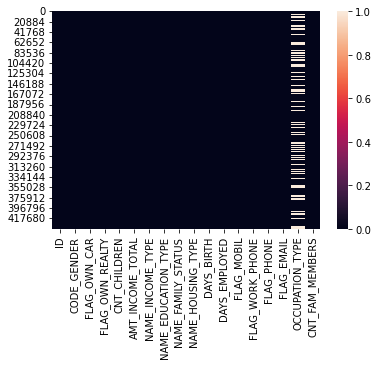

In [25]:
sns.heatmap(app.isnull())
plt.show()

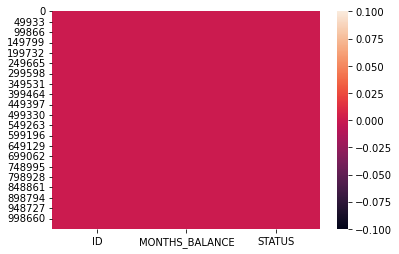

In [26]:
sns.heatmap(rec.isnull())
plt.show()

In [27]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [28]:
rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [31]:
app.drop('OCCUPATION_TYPE',axis=1,inplace=True)

In [45]:
le = LabelEncoder()
for x in app:
    if app[x].dtypes == 'object':
        app[x] = le.fit_transform(app[x])

In [48]:
app.drop_duplicates(subset='ID',inplace=True)

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

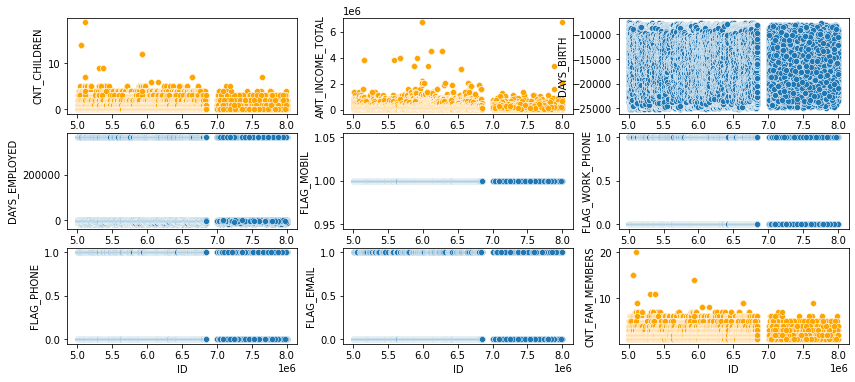

In [49]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

In [ ]:
high_qu = app['CNT_CHILDREN'].quantile(0.999)
low_qu = app['CNT_CHILDREN'].quantile(0.001)

app = app[(app['CNT_CHILDREN']>low_qu)&(app['CNT_CHILDREN']<high_qu)]

In [ ]:
high_qu = app['AMT_INCOME_TOTAL'].quantile(0.999)
low_qu = app['AMT_INCOME_TOTAL'].quantile(0.001)

app = app[(app['AMT_INCOME_TOTAL']>low_qu)&(app['AMT_INCOME_TOTAL']<high_qu)]